In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Loading datasets
red_wine = pd.read_csv("winequality-red.csv", delimiter=";")
white_wine = pd.read_csv("winequality-white.csv", delimiter=";")

# Combining both the datasets
wine_data = pd.concat([red_wine, white_wine], axis=0)

# Normalizing the dataset 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_data.drop(columns=["quality"], errors="ignore"))

# Converting back to DataFrame 
wine_data_scaled = pd.DataFrame(X_scaled, columns=[col for col in wine_data.columns if col != "quality"])
print("Preprocessed Data Shape:", wine_data_scaled.shape)


Preprocessed Data Shape: (6497, 11)


Explained Variance by Components: [0.2754426  0.22671146 0.14148609]


C:\Users\A\AppData\Local\Temp\ipykernel_26552\886845451.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, cmap="coolwarm")


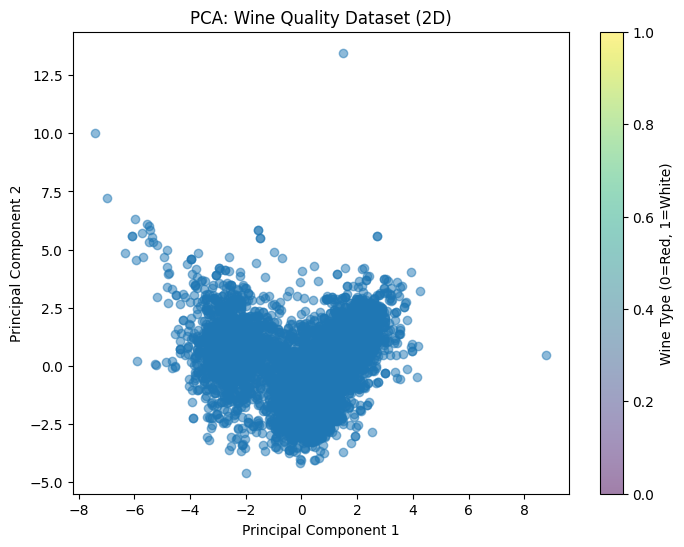

C:\Users\A\AppData\Local\Temp\ipykernel_26552\886845451.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5, cmap="coolwarm")


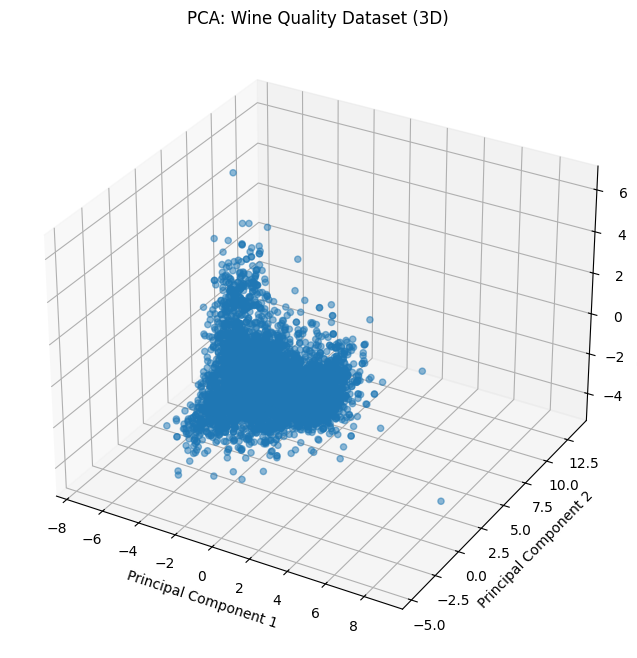

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA (keeping 2 components for 2D and 3 components for 3D visualization)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(wine_data_scaled)

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Components:", explained_variance)

# 2D PCA Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, cmap="coolwarm")
plt.title('PCA: Wine Quality Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label="Wine Type (0=Red, 1=White)")
plt.show()

# 3D PCA Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5, cmap="coolwarm")
ax.set_title('PCA: Wine Quality Dataset (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


PC1: 27.54%
PC2: 22.67%
PC3: 14.15%
These three components together explain 64.36% of the total variance in the dataset.

The trade-off in dimensionality reduction is between simplifying the dataset (reducing dimensions for better visualization and computation efficiency) and preserving as much information as possible. Reducing dimensions allows us to visualize data in 2D or 3D, as seen in the above two plots. However, this comes at the cost of losing some information since the variance captured is not 100%.

In this case, by reducing the dataset to two principal components (PC1 & PC2), 50.21% of the variance is retained, but 49.79% is lost. While this allows for an easier visualization of data, some structure and variance in the data may be missing.

C:\Users\A\AppData\Local\Temp\ipykernel_26552\3408721420.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, cmap="coolwarm")


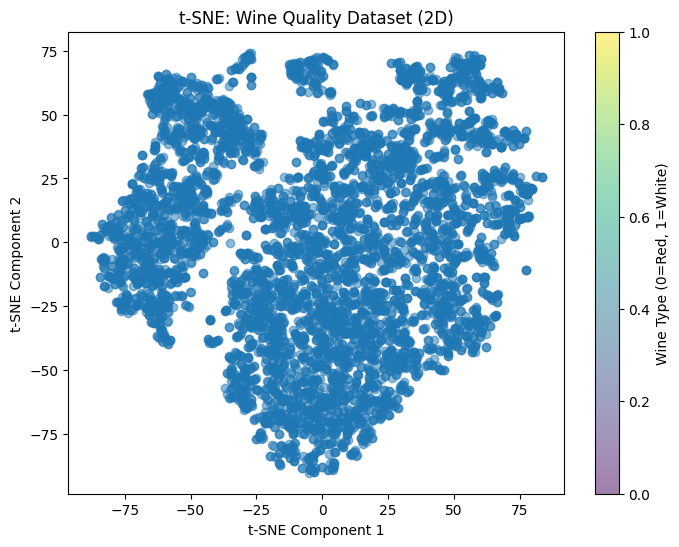

In [41]:
from sklearn.manifold import TSNE

# Applying t-SNE (2D projection)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(wine_data_scaled)

# t-SNE Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, cmap="coolwarm")
plt.title('t-SNE: Wine Quality Dataset (2D)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label="Wine Type (0=Red, 1=White)")
plt.show()


Interpretability and Clustering
PCA :

PCA performs a linear transformation of the data, maximizing variance along the principal components.
It retains global structure, meaning similar points in high dimensions remain close in the lower-dimensional space.
The PCA scatter plots show a dense cluster with some dispersed points, indicating that the dataset may not have clear, well-separated clusters.
    
t-SNE :

t-SNE is a non-linear technique that focuses on preserving the local structure of the data.
It is better at revealing clusters and patterns than PCA, making it more useful for visualizing complex structures.
In the t-SNE plot, the data points are more separated, suggesting that the method has better captured different groupings.
Handling High-Dimensional Data

PCA:

Projects high-dimensional data into a lower-dimensional linear subspace, capturing maximum variance.
Works well for interpretable dimensionality reduction but may struggle to capture complex, non-linear relationships.
    
t-SNE:

Uses probability distributions to maintain local relationships and does not assume linearity.
Can reveal hidden clusters more effectively than PCA but is computationally more expensive.
Unlike PCA, t-SNE is not deterministic, meaning it can give slightly different results each time.
    
Key Takeaway:

Using PCA when interpretability and variance preservation are important (e.g., for feature selection or linear relationships).
Using t-SNE when the goal is to visualize clusters in complex, high-dimensional data (e.g., image recognition, genomics).

# PCA vs t-SNE Discussion

- **PCA**:
  - **Linear** dimensionality reduction technique.
  - Focuses on maximizing the global variance of the data.
  - Produces orthogonal principal components (PCs), meaning the components are uncorrelated.
  - Easy to interpret and less computationally expensive compared to non-linear methods like t-SNE.
  - **Limitation**: It assumes linear relationships in the data and may miss capturing non-linear patterns, which can be important for certain datasets.

- **t-SNE**:
  - **Non-linear** technique that focuses on preserving local structure.
  - Focuses on preserving local structure, keeping similar points close together in lower-dimensional space.                                                                                                                             
  - Often used for clustering and visualizing complex high-dimensional datasets.
  - Can provide better separation between clusters, but may distort global relationships (e.g., distances between clusters)..
  - Computationally expensive and requires careful tuning of parameters like perplexity and learning rate.
  - Best suited for visualization rather than general-purpose dimensionality reduction.

- **Comparison**:
  - PCA is faster and less computationally expensive than t-SNE, making it more suitable for large datasets.
  - t-SNE often provides better separation of clusters in high-dimensional data, but it focuses on local relationships rather than global variance, which can distort the overall data structure.
  - PCA is useful when a global understanding of the data is needed, as it maximizes variance across the entire dataset. It works well for tasks like feature engineering or compression.
  - t-SNE, on the other hand, is primarily used for visual exploration of data and is better suited for discovering and visualizing local patterns and cluster formation.

- **Trade-offs**:
  - **PCA** involves a trade-off in dimensionality reduction, where some variance is lost. However, it retains enough global structure for most tasks, making it useful for general understanding and data compression.
  - **t-SNE** preserves more meaningful local structures but may distort global relationships, especially for high-dimensional data. It’s particularly useful for visualizing complex data but is not ideal for tasks like feature selection or general reduction.
